In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

url='https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-heberman.csv'
df = pd.read_csv(url)
     

In [2]:
df.head(5)

,age,operation_year,axil_nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [3]:

features=['age','operation_year','axil_nodes']
x=df[features]
df['status']=df['status'].map({1:0, 2:1})
y=df.status

In [4]:
# Split train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5)
# apply Logistic regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
     

LogisticRegression()

In [5]:

# check accuracy
print('Coefficients:', logreg.coef_)
print('Intercept:', logreg.intercept_)
 
predictions = logreg.predict(x_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 0.01558675 -0.03293527  0.07053309]]
Intercept: [-0.00057878]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90        60
           1       1.00      0.18      0.30        17

    accuracy                           0.82        77
   macro avg       0.91      0.59      0.60        77
weighted avg       0.85      0.82      0.76        77

Confusion Matrix:
 [[60  0]
 [14  3]]
Accuracy Score: 0.8181818181818182
Precision: 1.0
Recall: 0.17647058823529413


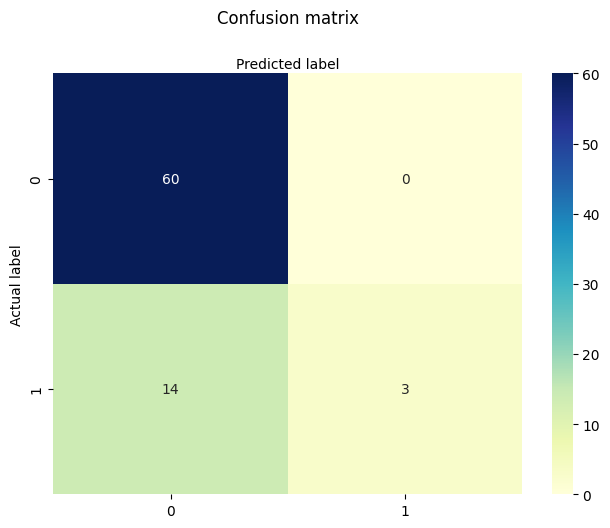

In [6]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
###create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
     